In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Split dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
# Models to evaluate
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, random_state=42))
    ]),
    
    "SVM (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", probability=True, random_state=42))
    ]),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    
    "KNN (k=5)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),
    
    "Naive Bayes": GaussianNB(),
    
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

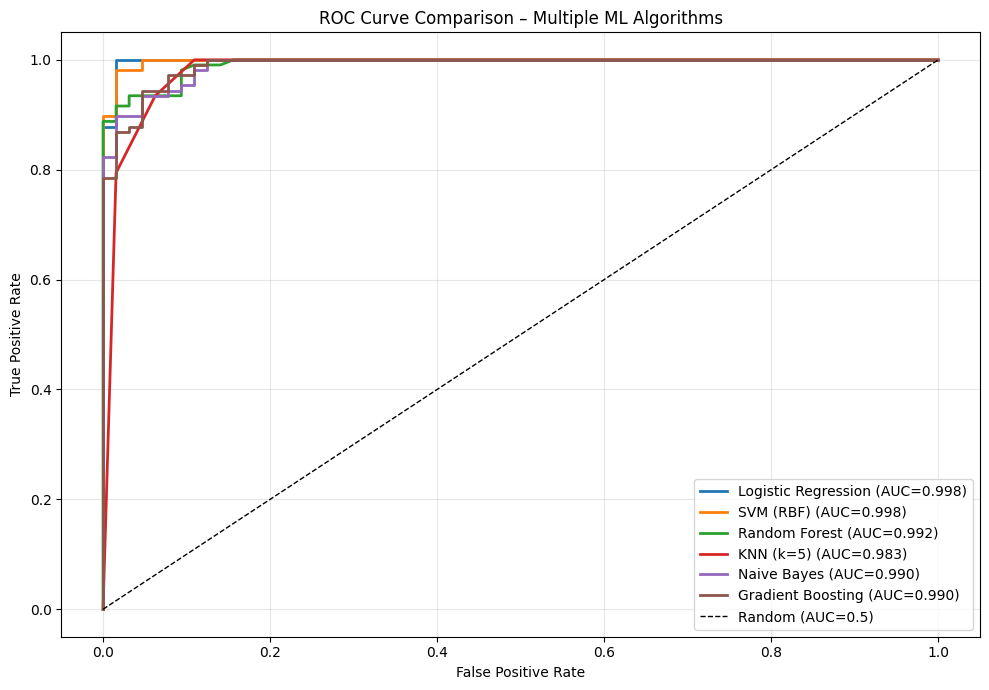

In [5]:
# Plot ROC Curves
plt.figure(figsize=(10, 7))

auc_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_val = roc_auc_score(y_test, y_scores)

    auc_scores.append([name, auc_val])
    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC={auc_val:.3f})")

plt.plot([0, 1], [0, 1], "k--", linewidth=1, label="Random (AUC=0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Multiple ML Algorithms")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

In [6]:
# AUC Table (Sorted)
df_auc = pd.DataFrame(auc_scores, columns=["Model", "AUC Score"])
df_auc = df_auc.sort_values(by="AUC Score", ascending=False)

print("\nAUC Scores (Best → Worst):\n")
print(df_auc)


AUC Scores (Best → Worst):

                 Model  AUC Score
0  Logistic Regression   0.998102
1            SVM (RBF)   0.997810
2        Random Forest   0.992261
4          Naive Bayes   0.990070
5    Gradient Boosting   0.989924
3            KNN (k=5)   0.982696
